For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x=np.linspace(1,20)

In [3]:
print(x)

[ 1.          1.3877551   1.7755102   2.16326531  2.55102041  2.93877551
  3.32653061  3.71428571  4.10204082  4.48979592  4.87755102  5.26530612
  5.65306122  6.04081633  6.42857143  6.81632653  7.20408163  7.59183673
  7.97959184  8.36734694  8.75510204  9.14285714  9.53061224  9.91836735
 10.30612245 10.69387755 11.08163265 11.46938776 11.85714286 12.24489796
 12.63265306 13.02040816 13.40816327 13.79591837 14.18367347 14.57142857
 14.95918367 15.34693878 15.73469388 16.12244898 16.51020408 16.89795918
 17.28571429 17.67346939 18.06122449 18.44897959 18.83673469 19.2244898
 19.6122449  20.        ]


In [4]:
y = -2*x+1

print(y)

[ -1.          -1.7755102   -2.55102041  -3.32653061  -4.10204082
  -4.87755102  -5.65306122  -6.42857143  -7.20408163  -7.97959184
  -8.75510204  -9.53061224 -10.30612245 -11.08163265 -11.85714286
 -12.63265306 -13.40816327 -14.18367347 -14.95918367 -15.73469388
 -16.51020408 -17.28571429 -18.06122449 -18.83673469 -19.6122449
 -20.3877551  -21.16326531 -21.93877551 -22.71428571 -23.48979592
 -24.26530612 -25.04081633 -25.81632653 -26.59183673 -27.36734694
 -28.14285714 -28.91836735 -29.69387755 -30.46938776 -31.24489796
 -32.02040816 -32.79591837 -33.57142857 -34.34693878 -35.12244898
 -35.89795918 -36.67346939 -37.44897959 -38.2244898  -39.        ]


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [5]:


def Predict_y(theta0,theta1):
    return theta0+theta1*x


def CostFunc(predictedY):
    return 0.5 * (1/m) * (np.sum((predictedY- y)**2))


def GradientTheta(predictedY):
    grad_theta0=(1/m) * np.sum(predictedY - y)
    grad_theta1=(1/m) * np.sum((predictedY - y) * x)
    return grad_theta0, grad_theta1


    
def UpdateThetas(theta0,theta1,predictedY):
    Grad_Of_Theta0,Grad_Of_Theta1=GradientTheta(predictedY)
    Grad_Vec = np.array([Grad_Of_Theta0,Grad_Of_Theta0])
    theta_0update=theta0 - L_R * Grad_Of_Theta0
    theta_1update=theta1 - L_R * Grad_Of_Theta1
    return Grad_Vec, theta_0update, theta_1update




def FindBestThetas(x,y,L_R,Max_iterations):
    
    theta0=0
    theta1=0
    theta0List=[]
    theta1List=[]
    
    predictedYList=[]
    CostFunList=[]
    iterations=0
  
    while (iterations < Max_iterations) :
            
            if iterations > 1:
                if np.linalg.norm(grad_vec)< 10**-4:
                    print("Grad condition stopped the iterations")
                    break
                elif abs(CostFunList[iterations-1]- CostFunList[iterations-2])< 10**-6:
                    print("cost condition stoppped the iterations")
                    break
            
        
            theta0List.append(theta0)
            theta1List.append(theta1)
            
            predictedY= Predict_y(theta0,theta1)
            predictedYList.append(predictedY)
            
            Jcost1=CostFunc(predictedY)
            CostFunList.append(Jcost1)
            
            grad_vec, theta0,theta1=  UpdateThetas(theta0,theta1,predictedY)
            
            

            
            iterations+=1
            
            
    return theta0List,theta1List,CostFunList,predictedYList,theta0,theta1,iterations
        




#### Try your function with any input parameterss of your choice.

In [6]:

#Learning_Rate
L_R=0.001

m=len(y)

Max_iterations=5000

Theta0_List,Theta1_List,Cost_List,predictedY_List,BestTheta0,BestTheta1,iterationsDone= FindBestThetas(x,y,L_R,Max_iterations)
BestYPredicted= Predict_y(BestTheta0,BestTheta1)
print("BestTheta1:",BestTheta1)
print("BestTheta0:",BestTheta0)
print(iterationsDone)

BestTheta1: -1.971752994010403
BestTheta0: 0.6197650305785979
5000


In [7]:
print(Theta1_List)

[0, -0.2726224489795918, -0.5064421302582257, -0.7069822777702424, -0.8789799414193296, -1.026497893497389, -1.153020606203685, -1.2615365676037986, -1.354608880631962, -1.4344358129430423, -1.502902728022813, -1.5616266243589971, -1.611994334850959, -1.6551952888676145, -1.692249610913013, -1.7240322196926956, -1.751293496888786, -1.7746770139157673, -1.794734735427655, -1.8119400587389327, -1.8266989971979908, -1.8393597717051944, -1.850221036962265, -1.8595389367870292, -1.8675331551658374, -1.8743921059916062, -1.8802773840880542, -1.8853275826695766, -1.8896615674191037, -1.89338128452962, -1.896574169045538, -1.899315210397747, -1.9016687239278192, -1.9036898702512406, -1.9054259583525817, -1.9069175631964665, -1.9081994842564012, -1.909301567605407, -1.9102494109892456, -1.9110649685386372, -1.911767069405986, -1.9123718625787056, -1.9128931983772564, -1.9133429556502777, -1.9137313223963541, -1.914067036441728, -1.914357591859646, -1.9146094160077165, -1.914828021365549, -1.915

#### Calculate r2 score

In [8]:
from sklearn.metrics import r2_score

r2_score(y,BestYPredicted)

0.9997446690194481

#### Plot loss vs. epochs

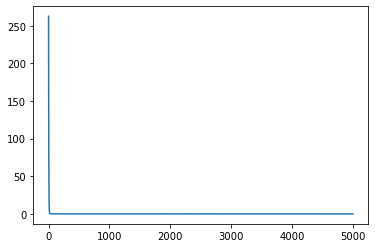

In [9]:
plt.plot(range(0,iterationsDone),Cost_List)
plt.show()


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

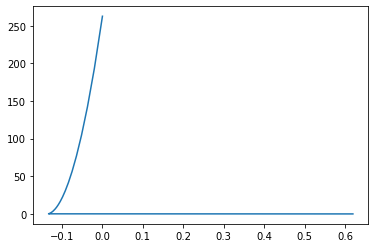

In [10]:
plt.plot(Theta0_List,Cost_List)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

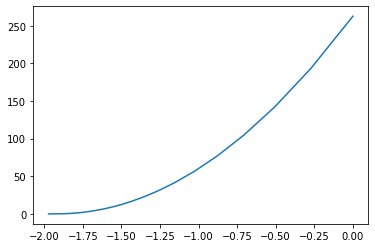

In [11]:
plt.plot(Theta1_List,Cost_List)
plt.show

#### Plot all regression lines till converge

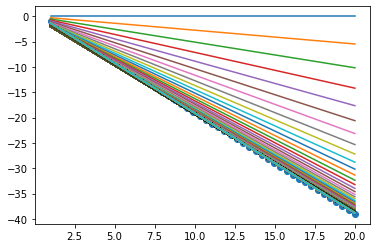

In [12]:
plt.scatter(x,y)
for h in predictedY_List:
    
    plt.plot(x,h)


#### Plot the best regression line

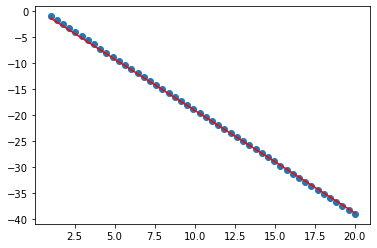

In [13]:
plt.scatter(x,y)
plt.plot(x,BestYPredicted,'r')
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [14]:

x=np.linspace(1,20)
y = -2*x+1

#Learning_Rate
L_R=0.01

m=len(y)

Max_iterations=400

Theta0_List,Theta1_List,Cost_List,predictedY_List,BestTheta0,BestTheta1,iterationsDone= FindBestThetas(x,y,L_R,Max_iterations)
BestYPredicted= Predict_y(BestTheta0,BestTheta1)
print("BestTheta1:",BestTheta1)
print("BestTheta0:",BestTheta0)


BestTheta1: -1.9648328566142375
BestTheta0: 0.5266125657760632


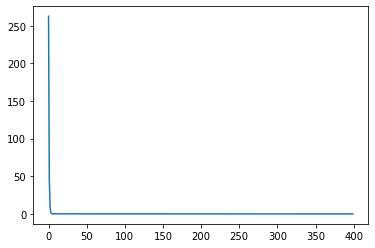

In [15]:
plt.plot(range(0,iterationsDone),Cost_List)
plt.show()

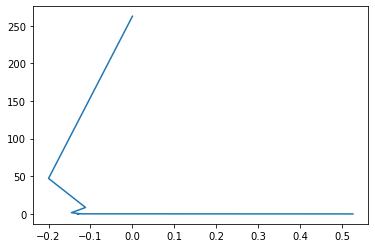

In [16]:
plt.plot(Theta0_List,Cost_List)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

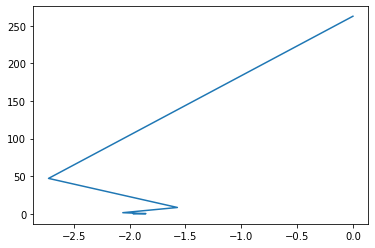

In [17]:
plt.plot(Theta1_List,Cost_List)
plt.show

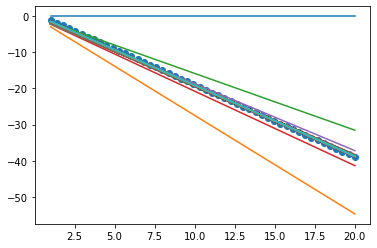

In [18]:
plt.scatter(x,y)
for h in predictedY_List:
    
    plt.plot(x,h)


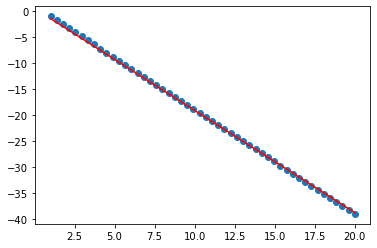

In [19]:
plt.scatter(x,y)
plt.plot(x,BestYPredicted,'r')
plt.show()


In [20]:
from sklearn.metrics import r2_score

r2_score(y,BestYPredicted)

0.9996042391288336

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [5]:
def Predict_y(theta0,theta1,x):
    return theta0+theta1*x


def CostFunc(predictedY,b_size,y):
    return 0.5 * (1/b_size) * (np.sum((predictedY- y)**2))


def GradientTheta(predictedY,b,x,y):
    grad_theta0=(1/b) * np.sum(predictedY - y)
    grad_theta1=(1/b) * np.sum((predictedY - y) * x)
    return grad_theta0, grad_theta1



    
def UpdateThetas(theta0,theta1,predictedY,b,x,y):
    Grad_Of_Theta0,Grad_Of_Theta1=GradientTheta(predictedY,b,x,y)
    Grad_Vec = np.array([Grad_Of_Theta0,Grad_Of_Theta0])
    theta_0update=theta0 - L_R * Grad_Of_Theta0
    theta_1update=theta1 - L_R * Grad_Of_Theta1
    return Grad_Vec, theta_0update, theta_1update





#Gradient_DescentfoMiniBatch
def FindBestThetas_MiniBatch(x,y,L_R,Max_iterations):
    #m=len(x)
    x_data=np.array_split(x,5)    
    y_data=np.array_split(y,5)
    theta0=0
    theta1=0
    theta0List=[]
    theta1List=[]
    
    predictedYList=[]
    CostFunList=[]
    iterations=0
    epochList=[]
    costPerEpoch=[]
    epoch=0
   
   
    while (iterations < Max_iterations) :
        epoch+=1
        epochList.append(epoch)
        

        if len(CostFunList) > 0:
             costPerEpoch.append(Jcost1)
             epochList.append(epoch)

        if iterations > 1 and iterations == b_size :
                if np.linalg.norm(grad_vec)< 10**-3:
                    print("grad")
                    break
                elif abs(CostFunList[iterations-1] - CostFunList[iterations - b_size] ) < 10**-4:
                    print("cost")
                    break
            
             

        for x,y in zip(x_data,y_data):
            
            b_size=len(x)

            theta0List.append(theta0)
            theta1List.append(theta1)
            
            predictedY= Predict_y(theta0,theta1,x)
            predictedYList.append(predictedY)
            
            Jcost1=CostFunc(predictedY,b_size,y)
            CostFunList.append(Jcost1)
            
            grad_vec, theta0,theta1=  UpdateThetas(theta0,theta1,predictedY,b_size,x,y)
            
            iterations+=1

            
            
    return theta0List,theta1List,CostFunList,predictedYList,theta0,theta1,iterations,epochList,costPerEpoch
        




In [6]:

x=np.linspace(1,20)
y = -2*x+1

L_R=0.001

Max_iterations=5000

Theta0_List,Theta1_List,Cost_List,predictedY_List,BestTheta0,BestTheta1,iterationsDone,EpochList,CostPerEpoch= FindBestThetas_MiniBatch(x,y,L_R,Max_iterations)
BestYPredicted= Predict_y(BestTheta0,BestTheta1,x)
print("BestTheta1:",BestTheta1)
print("BestTheta0:",BestTheta0)

x_data=np.array_split(x,5)    
y_data=np.array_split(y,5)
print(iterationsDone)

BestTheta1: -1.974883788807062
BestTheta0: 0.6292362244374917
5000


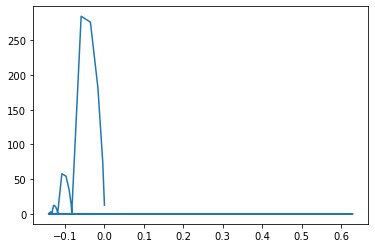

In [23]:
plt.plot(Theta0_List,Cost_List)
plt.show()

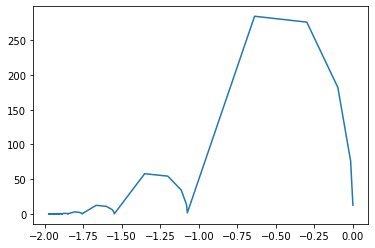

In [24]:
plt.plot(Theta1_List,Cost_List)
plt.show()

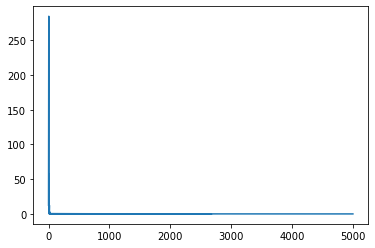

In [25]:
plt.plot(range(0,iterationsDone),Cost_List)
plt.show()

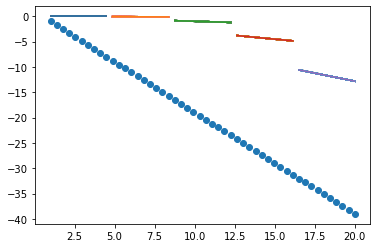

In [26]:
plt.scatter(x,y)

for i in range(len(x)+1):
    for x_in,h in zip(x_data,predictedY_List):
    
        plt.plot(x_in,h)

In [27]:
print(x.shape)
print(y.shape)

(50,)
(50,)


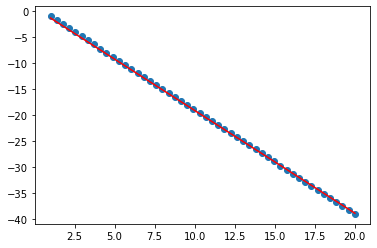

In [28]:
plt.scatter(x,y)
plt.plot(x,BestYPredicted,'r')
plt.show()


In [29]:
from sklearn.metrics import r2_score

r2_score(y,BestYPredicted)

0.9997508066378054

In [30]:
print()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [31]:
def Predict_y(theta0,theta1,x):
    return theta0+theta1*x


def CostFunc(predictedY,y):
    return (predictedY- y)**2

def GradientTheta(predictedY,x,y):
    grad_theta0=2*(predictedY - y)
    grad_theta1=2*(predictedY - y) * x
    return grad_theta0, grad_theta1

    
def UpdateThetas(theta0,theta1,predictedY,x,y):
    Grad_Of_Theta0,Grad_Of_Theta1=GradientTheta(predictedY,x,y)
    Grad_Vec = np.array([Grad_Of_Theta0,Grad_Of_Theta0])
    theta_0update=theta0 - L_R * Grad_Of_Theta0
    theta_1update=theta1 - L_R * Grad_Of_Theta1
    return Grad_Vec, theta_0update, theta_1update

def FindBestThetas_Stochastic(all_x,all_y,L_R,Max_iterations):
    
      
    theta0=0
    theta1=0
    theta0List=[]
    theta1List=[]
    
    predictedYList=[]
    CostFunList=[]
    iterations=0
    epoch_size=len(all_x)
  
    while (iterations < Max_iterations) :
       
        if iterations > 1 and iterations >= epoch_size:
                if np.linalg.norm(grad_vec)< 10**-2:
                    print("I broke from grad")
                    break
                elif abs(CostFunList[iterations-1]- CostFunList[iterations-2*epoch_size])< 10**-4:
                    print("I broke from cost")
                    break
        

        for x,y in zip(all_x,all_y):

            theta0List.append(theta0)
            theta1List.append(theta1)
            
            predictedY= Predict_y(theta0,theta1,x)
            predictedYList.append(predictedY)
            
            Jcost1=CostFunc(predictedY,y)
            CostFunList.append(Jcost1)
            
            grad_vec, theta0,theta1=  UpdateThetas(theta0,theta1,predictedY,x,y)
       
            iterations+=1
           
            
            
    return theta0List,theta1List,CostFunList,predictedYList,theta0,theta1,iterations
        




In [32]:
x=np.linspace(1,20)
y = -2*x + 1

#Learning_Rate
L_R=0.003

Max_iterations=10000

Theta0_List,Theta1_List,Cost_List,predictedY_List,BestTheta0,BestTheta1,iterationsDone= FindBestThetas_Stochastic(x,y,L_R,Max_iterations)
BestYPredicted= Predict_y(BestTheta0,BestTheta1,x)
print("BestTheta1:",BestTheta1)
print("BestTheta0:",BestTheta0)
print(iterationsDone)



I broke from grad
BestTheta1: -1.9786308842062514
BestTheta0: 0.5676576430609681
1850


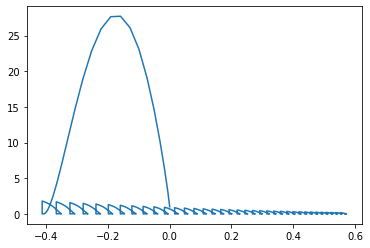

In [33]:
plt.plot(Theta0_List,Cost_List)
plt.show()

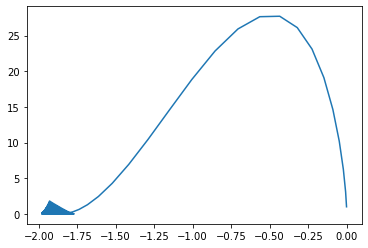

In [34]:
plt.plot(Theta1_List,Cost_List)
plt.show()

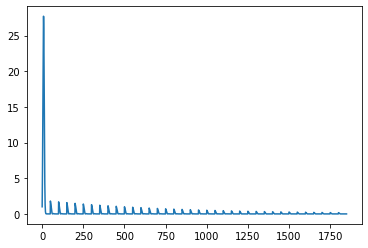

In [35]:
plt.plot(range(iterationsDone),Cost_List)
plt.show()

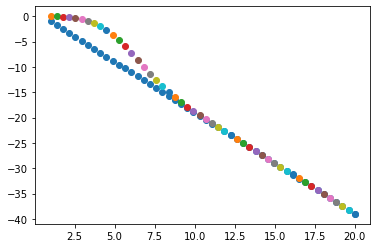

In [36]:
plt.scatter(x,y)
all_x=list(x)

for x_i,h_i in zip(all_x,predictedY_List):
    
    plt.scatter(x_i,h_i)

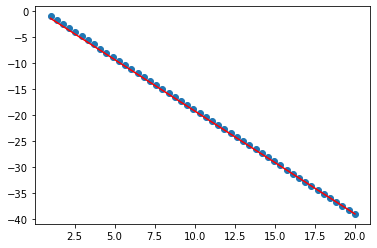

In [37]:
plt.scatter(x,y)
plt.plot(x,BestYPredicted,'r')
plt.show()

In [38]:
from sklearn.metrics import r2_score

r2_score(y,BestYPredicted)

0.9995405157860475